In [1]:
import sys 
sys.path.append("..")

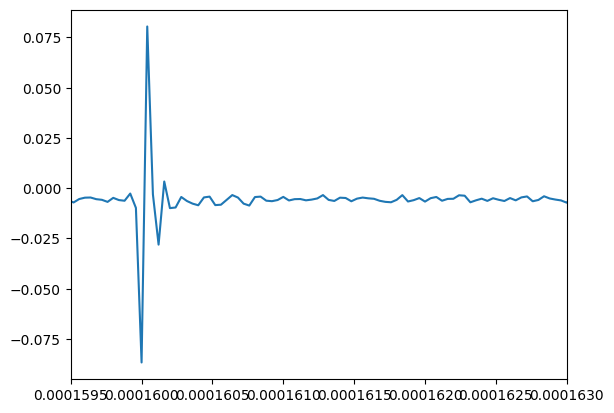

In [2]:
import analysis
import matplotlib.pyplot as plt
import numpy as np

s = analysis.System("sagnac", ["../../data/20240524/moved_al_target/iter_0.tdms"], channel = "X")
null_indexes = np.array([], dtype = int)
for j, c in enumerate(s.get_data()[0].collection):
    if np.max(c.x) < 0.05:
        null_indexes = np.append(null_indexes, j)
null_indexes = np.flip(np.array(null_indexes))
for k in null_indexes:
    s.get_data()[0].collection = np.delete(s.get_data()[0].collection, int(k))

fig, ax = plt.subplots()
s.get_data()[0].aggrigate(collection_slice = slice(0, len(s.get_data()[0].collection), 1))
ax.set_xlim([0.0001595, 0.000163])
ax.plot(s.get_data()[0].agg.t, s.get_data()[0].agg.x)
plt.show()

In [3]:
dists = ["7-4cm", "8cm", "8-5cm", "9cm", "9-5cm", "10cm", "10-5cm", "11cm", "11-5cm", "12cm", "12-5cm"]
df = ["../../data/20240528/ablation_scan_" + x + "/iter_0.tdms" for x in dists]
s = analysis.System("sagnac", df, channel = "X")
null_indexes = [np.array([], dtype = int) for x in range(0, len(s.get_data()))]
for i in range(len(s.get_data())):
    for j, c in enumerate(s.get_data()[i].collection):
        if np.max(c.x) < 0.05:
            null_indexes[i] = np.append(null_indexes[i], j)
    null_indexes[i] = np.flip(np.array(null_indexes[i]))
    for k in null_indexes[i]:
        s.get_data()[i].collection = np.delete(s.get_data()[i].collection, int(k))

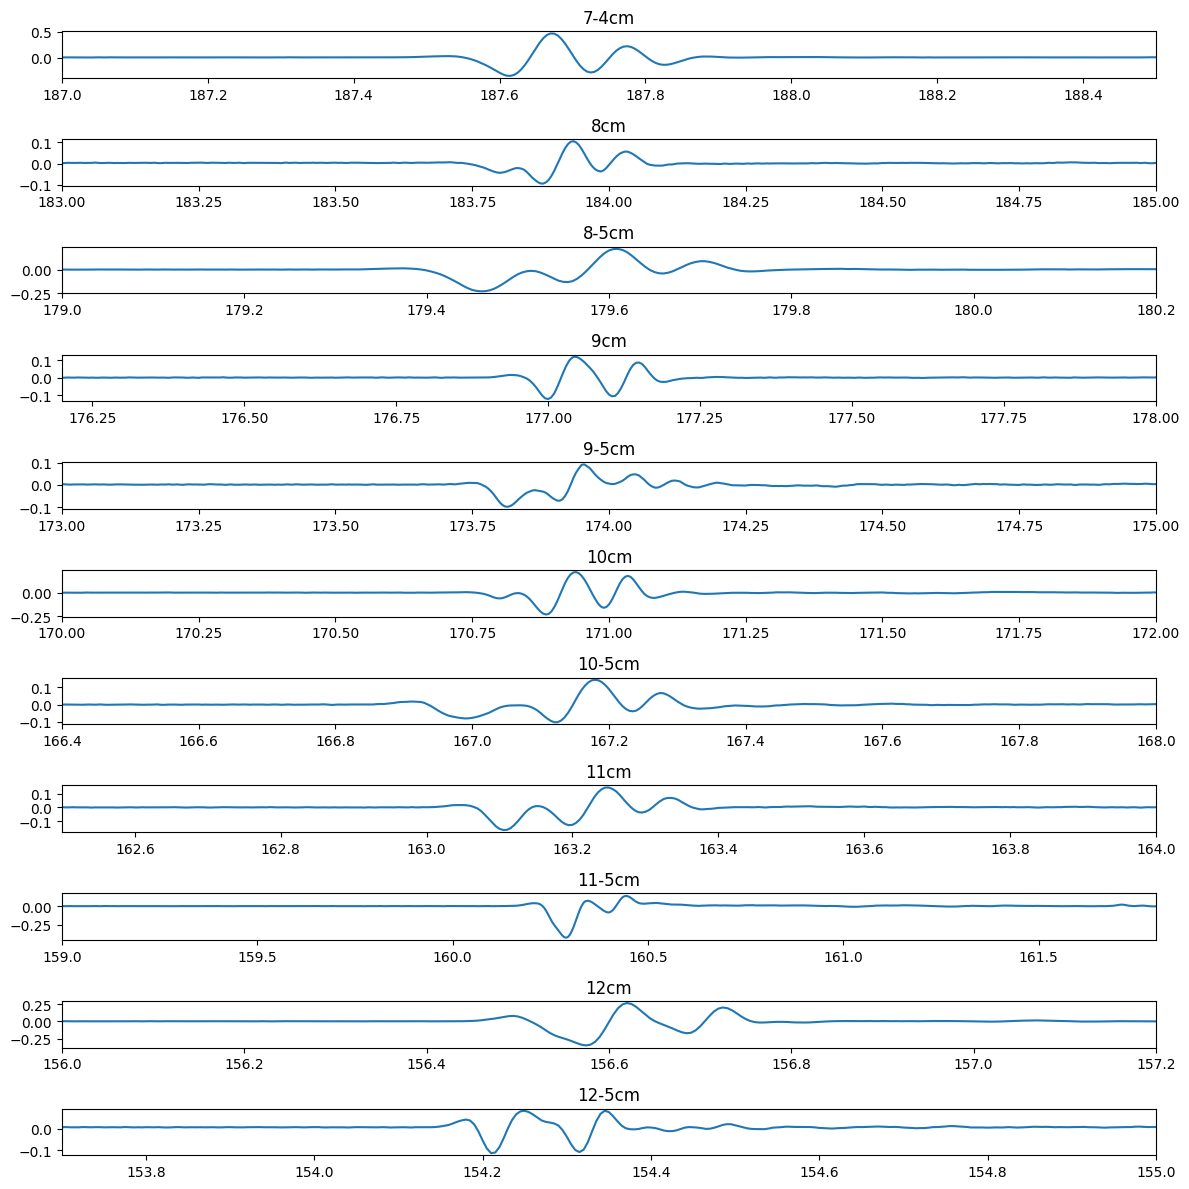

In [77]:
fig, ax = plt.subplots(len(s.get_data()), 1, figsize = (12, 12))
limits = [[0.000187, 0.0001885], [0.000183, 0.000185], [0.000179, 0.0001802], [0.0001762, 0.000178], [0.000173, 0.000175], [0.00017, 0.000172], [0.0001664, 0.000168], [0.0001625, 0.000164], [0.000159, 0.0001618], [0.000156, 0.0001572], [0.0001537, 0.000155]]
for i, d in enumerate(s.get_data()):
    ax[i].set_title(dists[i])
    d.aggrigate(collection_slice = slice(0, len(d.collection), 1))
    ax[i].plot(d.agg.t * 1e6, d.agg.x)
    ax[i].set_xlim(np.array(limits[i]) * 1e6)
fig.tight_layout()
plt.show()

187.595
[0.00000000e+00 5.33049041e+03 1.06609808e+04 ... 9.99840085e+07
 9.99893390e+07 9.99946695e+07]
1.0887554892193658


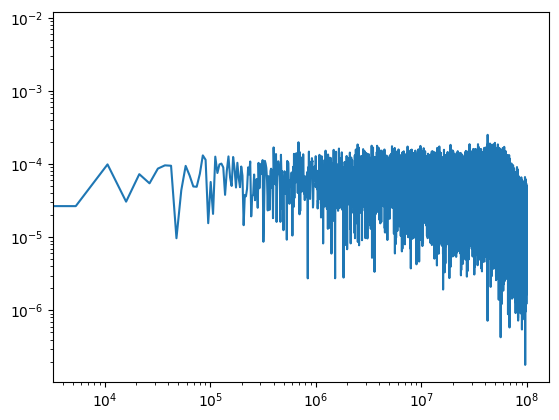

In [171]:
from scipy.fft import fft, ifft, fftfreq
c = 7
ind = 0
i = 37520
# i = 10000
def data(i, start = 0):
    return s.get_data()[ind].collection[c].t[start:i], s.get_data()[ind].collection[c].x[start:i]
val = data(i)[0][-1]
print(val * 1e6)
xf = fftfreq(len(data(i)[0]), 1 / s.get_data()[ind].r)[:len(data(i)[0])//2]
yf = fft(data(i)[1])
print(xf)
print(np.std(yf[1000:]))
plt.loglog(xf, 2 / len(data(i)[0]) * np.abs(yf[:len(data(i)[0])//2]))